In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Wigner ensemble (GOE) and the semicircle law

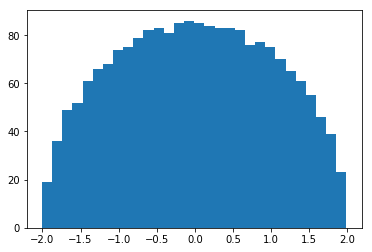

In [2]:
n = 2000
H_ = 2.**(-0.5)*np.random.randn(n,n)
H = H_+H_.T

eig = np.linalg.eigh(H)[0]/np.sqrt(n)
plt.hist(eig,30)
plt.show()

### The Wishart ensemble and the Marchenko-Pastur distribution

======= phi: 0.01
Left end of regular spectrum: 0.81
Right end of regular spectrum: 1.2100000000000002


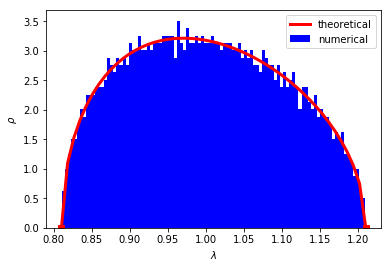

======= phi: 1.2
Left end of regular spectrum: 0.009109769979335531
Right end of regular spectrum: 4.3908902300206645


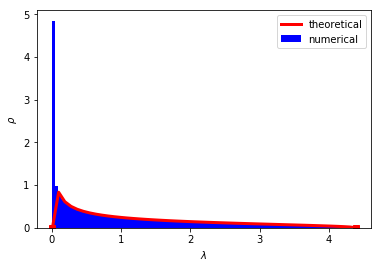

In [7]:
def plotDistrib(phi, n=2000):
    print ("======= phi:", phi) 
    p = int(n/phi)

    ## Numerical

    J = np.random.randn(n,p)
    H = J.dot(J.T)
    eig = np.linalg.eigh(H)[0]/p
    plt.hist(eig, 100, density=True, color='b', label='numerical')

    ## Theoretical

    def rho_MP(x,phi):
        # only the regular part
        lend = (1-np.sqrt(phi))**2
        rend = (1+np.sqrt(phi))**2
        return 1./(2*np.pi*phi)*np.sqrt(np.clip((x-lend)*(rend-x),0,np.inf))/x

    lend = (1-np.sqrt(phi))**2
    rend = (1+np.sqrt(phi))**2
    print ('Left end of regular spectrum:', lend)
    print ('Right end of regular spectrum:', rend)
    x = np.linspace(lend,rend)

    rho_theor = rho_MP(x,phi)
    plt.plot([lend],[0],'rs')
    plt.plot([rend],[0],'rs')
    plt.plot(x, rho_theor, 'r', lw=3, label='theoretical')
    
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\rho$')
    plt.legend()
    plt.show()
    
    
phi = 1e-2
plotDistrib(phi)
phi = 1.2
plotDistrib(phi)